In [43]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [44]:
catalog


{'Mental_Health_Dataset': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('C:/Users/radix/OneDrive/Escritorio/machine/Es_salud_mental/data/01_raw/Mental_Health_Dataset.csv'), "
                          "protocol='file', load_args={}, save_args={'index': "
                          'False})',
 'nulos_data': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('C:/Users/radix/OneDrive/Escritorio/machine/Es_salud_mental/data/02_intermediate/nulos_data.csv'), "
               "protocol='file', load_args={}, save_args={'index': False})",
 'imputed_data': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('C:/Users/radix/OneDrive/Escritorio/machine/Es_salud_mental/data/02_intermediate/imputed_data.csv'), "
                 "protocol='file', load_args={}, save_args={'index': False})",
 'mapped_data': "kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath('C:/Users/radix/OneDrive/Escritorio/machine/Es_salud_mental/data/02_i

***We import the libraries that we will work with in this phase.***

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│   2 import matplotlib.pyplot as plt                                                              │
│   3 import seaborn as sns                                                                        │
│   4 import numpy as np                                                                           │
│ ❱ 5 from sklearn.neighbors import LocalOutlierFactor                                             │
│   6 from sklearn.preprocessing import MinMaxScaler                                               │
│   7 from sklearn.preprocessing import StandardScaler                                             │
│   8                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'sklearn'

In [46]:
###%reload_kedro

***We load our dataset.***

In [49]:
df=catalog.load("Mental_Health_Dataset")
df.head()

[09/29/24 14:08:30] INFO     Loading data from Mental_Health_Dataset (CSVDataset)...            ]8;id=261237;file://C:\Users\radix\OneDrive\Escritorio\machine\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=424108;file://C:\Users\radix\OneDrive\Escritorio\machine\.venv\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


***We display the number of columns and rows in our dataset.***

In [50]:
num_rows, num_columns = df.shape
# Mostrar el resultado
print(f"El dataset tiene {num_columns} columnas y {num_rows} filas.")

El dataset tiene 17 columnas y 292364 filas.


In [7]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,734,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,2014-08-27 12:31:41,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,780,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


***We display the data types contained in each column of the dataset.***

In [8]:
df.dtypes #tipo de datos de todas las columnas


Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object

***Now we proceed to create a bar chart to see the distribution of gender (male and female) to know the total count.***

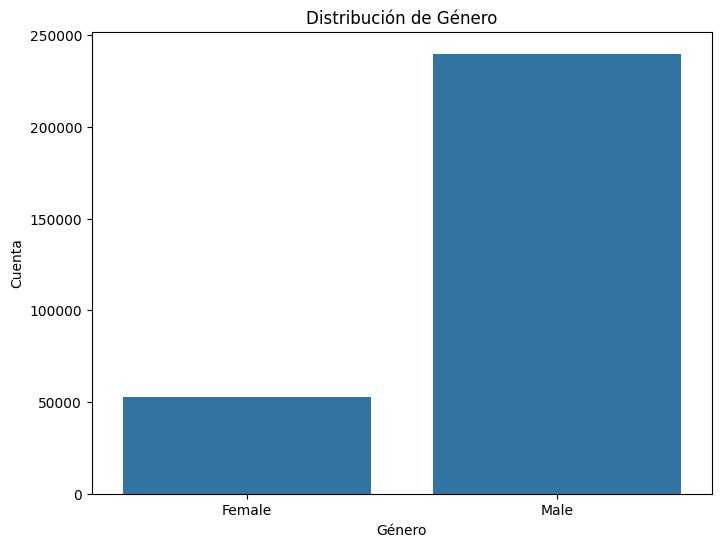

In [51]:
# Gráfico de barras para la distribución de género
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cuenta')
plt.show()

**We create a bar chart to see the distribution of mental health treatments by gender.**

[09/29/24 14:08:40] WARNING  C:\Users\radix\AppData\Local\Temp\ipykernel_17068\2424616177.py:1:     ]8;id=58210;file://C:\Users\radix\AppData\Local\Programs\Python\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=452262;file://C:\Users\radix\AppData\Local\Programs\Python\Python311\Lib\warnings.py#109\109]8;;\
                             FutureWarning: A value is trying to be set on a copy of a DataFrame or                
                             Series through chained assignment using an inplace method.                            
                             The behavior will change in pandas 3.0. This inplace method will never                
                             work because the intermediate object on which we are setting values                   
                             always behaves as a copy.                                                             
                                                                                                                   
                             For example, when doing 'df[col].method(value, inplace=True)', try                    
                             using 'df.method({col: value}, inplace=True)' or df[col] =                            
                             df[col].method(value) instead, to perform the operation inplace on the                
                             original object.                                                                      
                                                                                                                   
                                                                                                                   
                               df['self_employed'].fillna(df['self_employed'].mode()[0],                           
                             inplace=True)                                                                         
                                                                                                                   

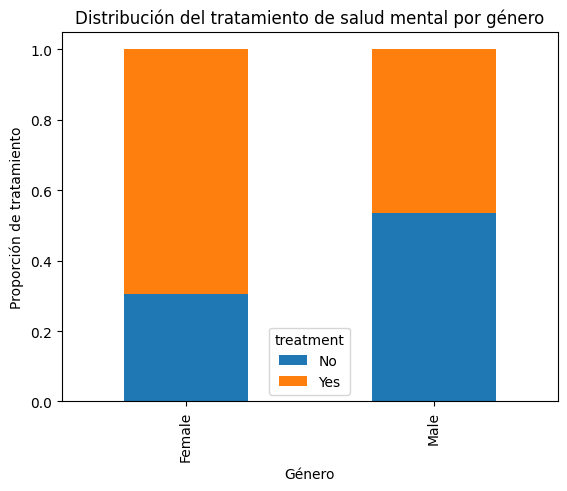

In [52]:
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)

# Crear una tabla de contingencia entre 'Gender' y 'treatment'
gender_treatment_crosstab = pd.crosstab(df['Gender'], df['treatment'], normalize='index')

# Graficar la tabla de contingencia
gender_treatment_crosstab.plot(kind='bar', stacked=True)

# Configuraciones adicionales del gráfico
plt.title('Distribución del tratamiento de salud mental por género')
plt.xlabel('Género')
plt.ylabel('Proporción de tratamiento')
plt.show()

***Then we create another bar chart to see the number of people divided by gender by country.***

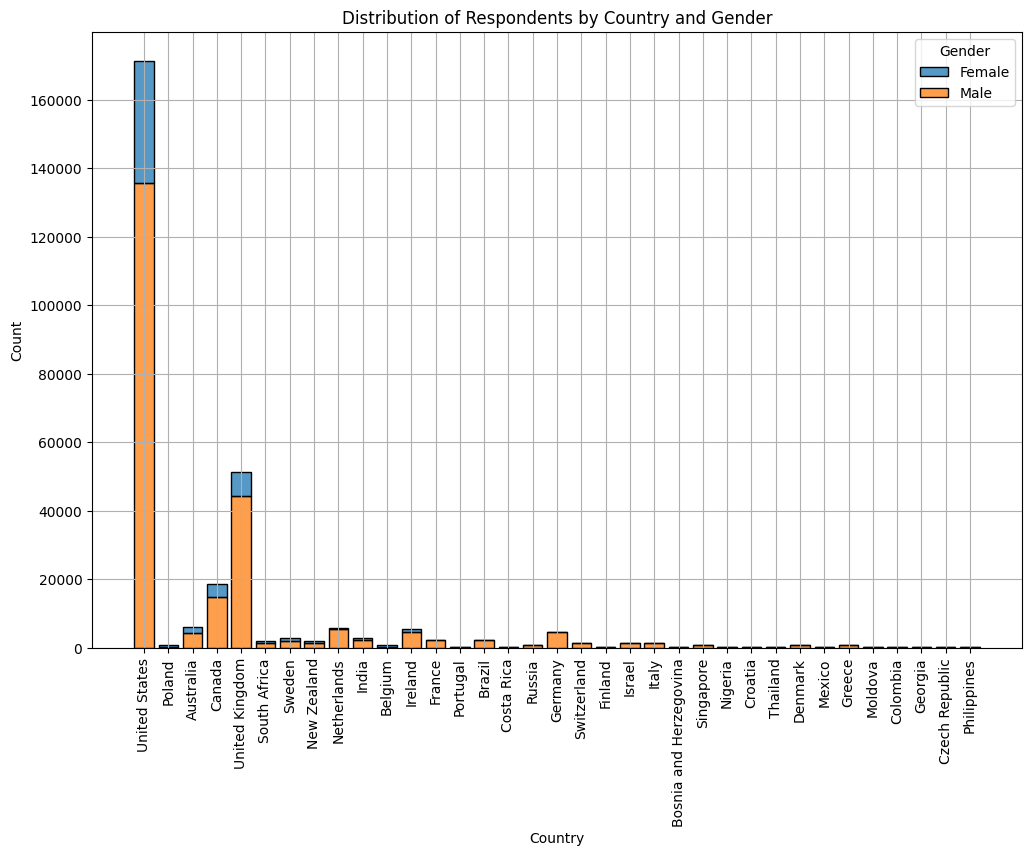

In [53]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Country', hue='Gender', multiple='stack', shrink=0.8)
plt.title('Distribution of Respondents by Country and Gender')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

***Then we will break down this chart as it contains a lot of information by showing the 10 countries with the most responses and the 10 countries with the least responses (excluding the United States).***

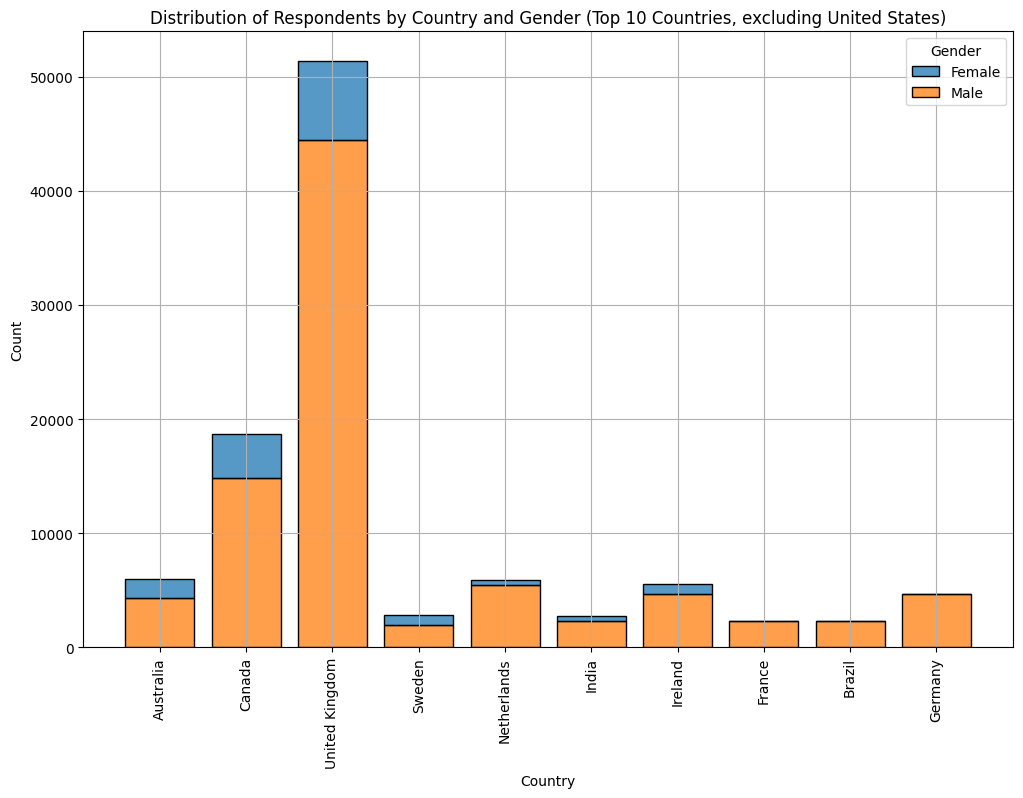

In [54]:
# Excluir a 'United States' de los datos
df_filtered = df[df['Country'] != 'United States']

# Agrupar por país y contar la cantidad de respuestas, excluyendo 'United States'
country_counts = df_filtered['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Seleccionar los 10 países con más respuestas y los 10 con menos respuestas
top_countries = country_counts.head(10)
bottom_countries = country_counts.tail(10)

# Filtrar los datos para los países con más respuestas
df_top_countries = df_filtered[df_filtered['Country'].isin(top_countries['Country'])]

# Filtrar los datos para los países con menos respuestas
df_bottom_countries = df_filtered[df_filtered['Country'].isin(bottom_countries['Country'])]

# Graficar los países con más respuestas
plt.figure(figsize=(12, 8))
sns.histplot(data=df_top_countries, x='Country', hue='Gender', multiple='stack', shrink=0.8)
plt.title('Distribution of Respondents by Country and Gender (Top 10 Countries, excluding United States)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


***Display a box plot with outliers based on the "Days_Indoors" column.***

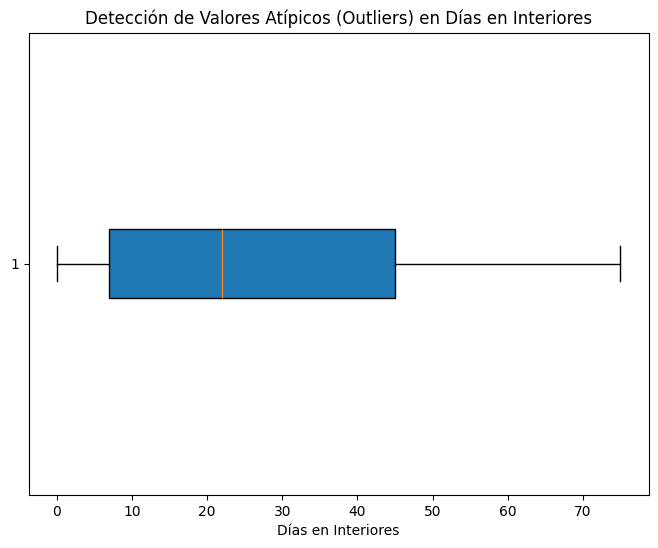

,Days_Indoors,Days_Indoors_Numeric


In [55]:
# Convertir la columna 'Days_Indoors' a valores numéricos
days_indoors_mapping = {
    "1-14 days": 7,
    "15-30 days": 22,
    "31-60 days": 45,
    "More than 2 months": 75,
    "Go out Every day": 0
}

# Crear una nueva columna numérica basada en la conversión
df['Days_Indoors_Numeric'] = df['Days_Indoors'].map(days_indoors_mapping)

# Graficar un boxplot para detectar outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['Days_Indoors_Numeric'], vert=False, patch_artist=True)
plt.title('Detección de Valores Atípicos (Outliers) en Días en Interiores')
plt.xlabel('Días en Interiores')
plt.show()

# Calcular los límites de los outliers usando el rango intercuartílico (IQR)
Q1 = df['Days_Indoors_Numeric'].quantile(0.25)
Q3 = df['Days_Indoors_Numeric'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df[(df['Days_Indoors_Numeric'] < lower_bound) | (df['Days_Indoors_Numeric'] > upper_bound)]

# Mostrar los outliers detectados
outliers[['Days_Indoors', 'Days_Indoors_Numeric']]

**Now we will calculate the central tendency and dispersion for the column Converted Days_Indoors_Numeric**

In [56]:
# Cálculo de tendencia central y dispersión para Days_Indoors_Num
media = df['Days_Indoors_Numeric'].mean()
mediana = df['Days_Indoors_Numeric'].median()
moda = df['Days_Indoors_Numeric'].mode()[0]
desviacion_std = df['Days_Indoors_Numeric'].std()
varianza = df['Days_Indoors_Numeric'].var()

print(f"Media: {media}, Mediana: {mediana}, Moda: {moda}, Desviación estándar: {desviacion_std}, Varianza: {varianza}")


Media: 29.25975496299134, Mediana: 22.0, Moda: 7, Desviación estándar: 27.201120820438568, Varianza: 739.9009738880965


**Then we will perform standardization and normalization based on the Days_Indoors_Numeric column.**

In [57]:
# Estandarización (Z-score)
scaler_standard = StandardScaler()
df['Days_Indoors_Standardized'] = scaler_standard.fit_transform(df[['Days_Indoors_Numeric']])

# Normalización (Min-Max)
scaler_minmax = MinMaxScaler()
df['Days_Indoors_Normalized'] = scaler_minmax.fit_transform(df[['Days_Indoors_Numeric']])

# Mostrar las primeras filas para verificar
print(df[['Days_Indoors_Numeric', 'Days_Indoors_Standardized', 'Days_Indoors_Normalized']].head())


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│    1 # Estandarización (Z-score)                                                                 │
│ ❱  2 scaler_standard = StandardScaler()                                                          │
│    3 df['Days_Indoors_Standardized'] = scaler_standard.fit_transform(df[['Days_Indoors_Numeri    │
│    4                                                                                             │
│    5 # Normalización (Min-Max)                                                                   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'StandardScaler' is not defined

**Then we will create box plots to visualize outliers, accompanied by histograms to better understand the data**

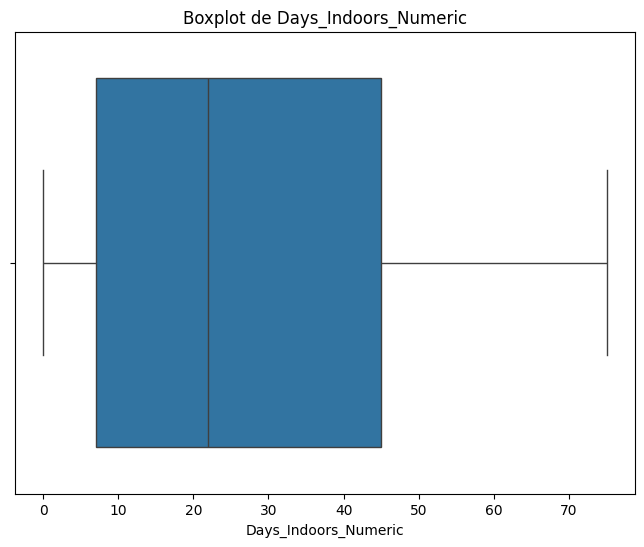

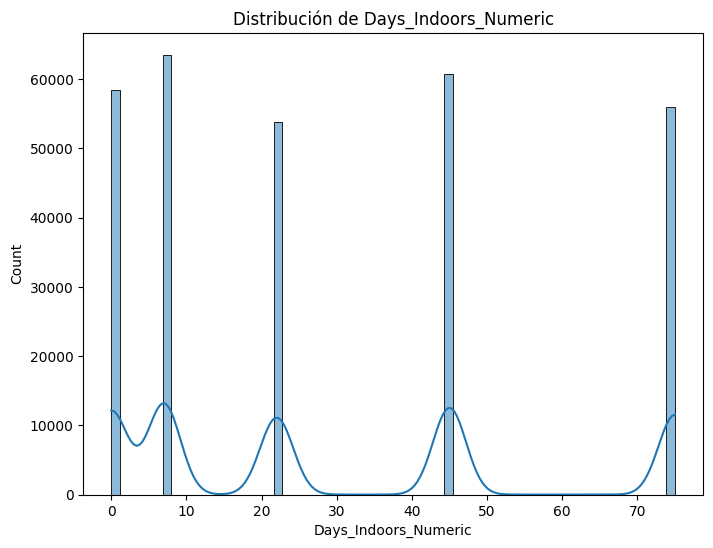

In [58]:
# Boxplot para visualizar outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Days_Indoors_Numeric'])
plt.title('Boxplot de Days_Indoors_Numeric')
plt.show()

# Histograma para la distribución
plt.figure(figsize=(8,6))
sns.histplot(df['Days_Indoors_Numeric'], kde=True)
plt.title('Distribución de Days_Indoors_Numeric')
plt.show()


***Then we will create a correlation matrix to analyze the numerical relationship between columns..***

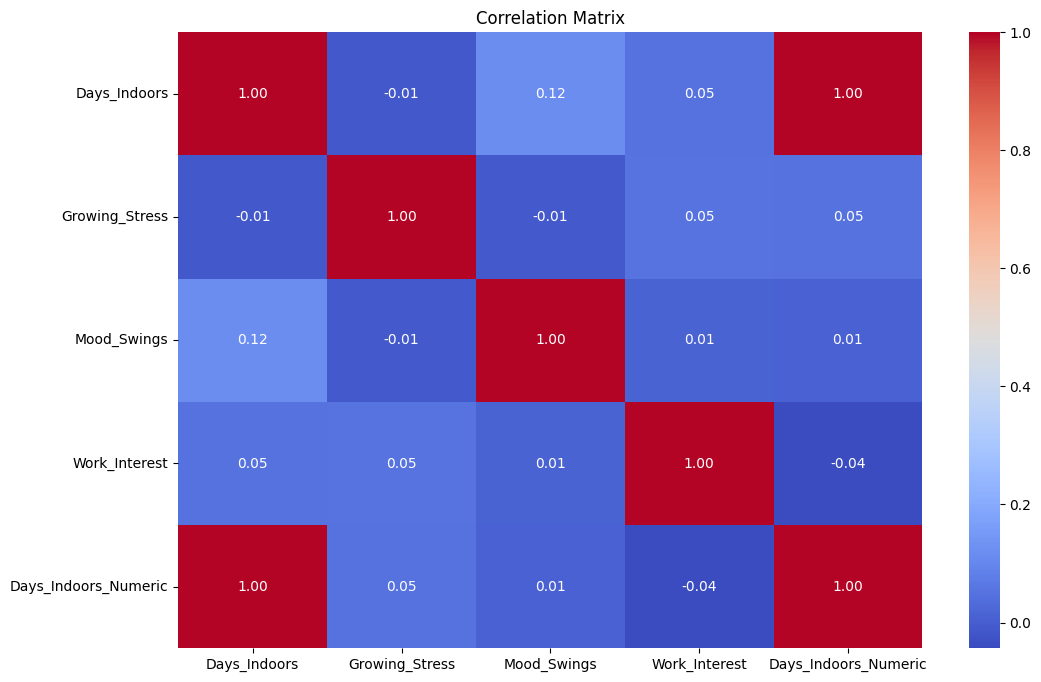

In [59]:
# Convertir columnas relevantes a valores numéricos (si aún no se ha hecho)
df['Days_Indoors'] = df['Days_Indoors'].map({'1-14 days': 1, '15-30 days': 2, 'More than 30 days': 3})
df['Growing_Stress'] = df['Growing_Stress'].map({'Yes': 1, 'No': 0})
df['Mood_Swings'] = df['Mood_Swings'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Work_Interest'] = df['Work_Interest'].map({'No': 0, 'Maybe': 1, 'Yes': 2})

# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


***We make a pie chart where we will see the distribution of work interest where we can see in red that people are not interested, in green that they are interested and in blue that they may be interested in their work.***

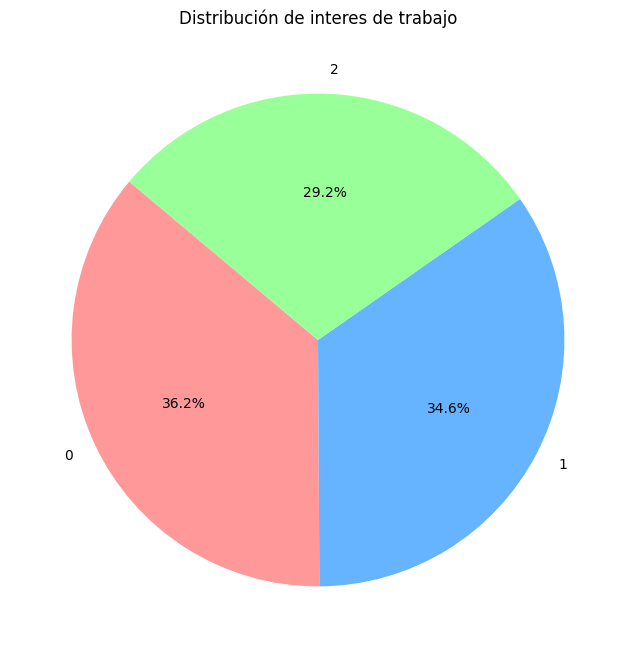

In [60]:
df['Work_Interest'].dropna(inplace=True)

# Contar las categorías en la columna 'Work_Interest'
work_interest_counts = df['Work_Interest'].value_counts()

# Crear el diagrama circular
plt.figure(figsize=(8, 8))
plt.pie(work_interest_counts, labels=work_interest_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribución de interes de trabajo')
plt.show()

**Using a violin graph, we can visualize how mood swings vary depending on the number of days spent indoors (Days Indoors). Each violin represents the distribution of mood levels in different groups, thus revealing how emotional changes are concentrated in each category of days spent indoors.**

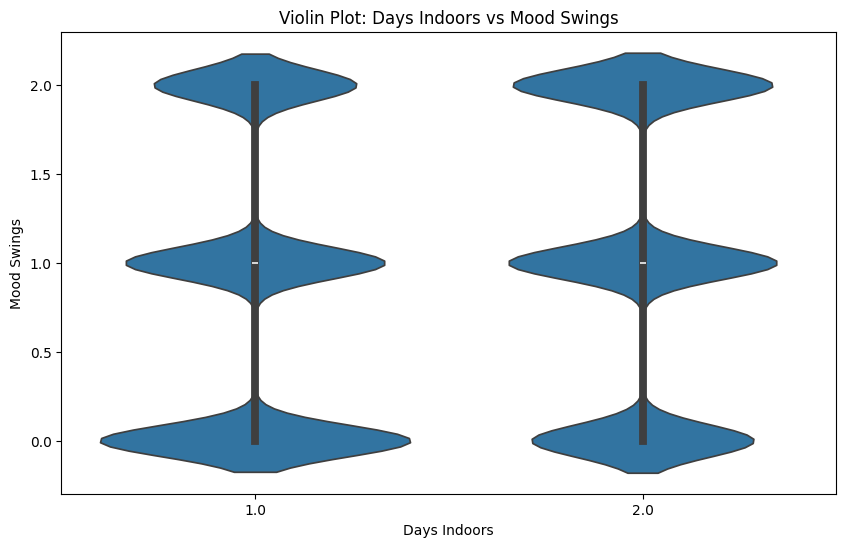

In [61]:
# El gráfico te permite visualizar rápidamente si hay una relación notable entre Days_Indoors y Mood_Swings, y cómo se distribuyen los diferentes 
# niveles de oscilaciones de humor dentro de cada categoría de días pasados en interiores.
plt.figure(figsize=(10, 6))
sns.violinplot(x='Days_Indoors', y='Mood_Swings', data=df)
plt.title('Violin Plot: Days Indoors vs Mood Swings')
plt.xlabel('Days Indoors')
plt.ylabel('Mood Swings')
plt.show()